**Import python packages that we will use for analysis**

When we import a package as something else, that is creating a shortcut for us to easily call the package. For example, import pandas as pd will allow us to type pd when calling a pandas function rather than pandas. 

In [1]:
from IPython.display import Image

import pandas as pd
import seaborn as sns
import os

# Let's us import sparse matrices
import scipy.io
import scipy.sparse
import csv

# "from" lets us import only a part of that package rather than the entire thing. 
# We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

# In order for plots to appear in the notebook we need this:
%matplotlib inline

**Define the directory where the data is located**

- We are going to store this directory as a variable input_dir.
- Let's also define an output directory where we'll be saving our outputs from this step (output_dir)

In [2]:
input_dir = 'inputs/'
output_dir = 'outputs/'

**Combining strings**

To get the full name of the file to read in, we need the directory plus the filename.

Combine two strings together in python with the +

In [3]:
fn = input_dir + "filtered_gene_bc_matrices" + "/" + "mm10" + "/" + "matrix.mtx"  # works 
fn = os.path.join(input_dir, "filtered_gene_bc_matrices", "mm10", "matrix.mtx")  # works better (on some machines, trailing slash is not guaranteed to exist)

print(fn)

inputs/filtered_gene_bc_matrices/mm10/matrix.mtx


Here we combined a variable and a string. Why did this work? 

Because the variable data_dir is a placeholder for another string (the full path to the directory).

We will use this method to read in the csv file using the pandas command read_csv

**Load in data with pandas**

To call a function from a package, write that package name followed by a period.
<b>Tab</b> after the period to see all the functions that are available to you. 

# Reading in counts files as MTX:
- "Dependency hell" - need to move /home/bay001/anaconda2/envs/brian/lib/libstdc++.so.6 softlink

In [4]:
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

mtx = os.path.join(input_dir, "filtered_gene_bc_matrices", "mm10", "matrix.mtx")
genes = os.path.join(input_dir, "filtered_gene_bc_matrices", "mm10", "genes.tsv")
barcodes = os.path.join(input_dir, "filtered_gene_bc_matrices", "mm10", "barcodes.tsv")

raw_counts = read_mtx_as_dataframe(mtx_file=mtx, columns_file=barcodes, rows_file=genes)
raw_counts.head()

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000109048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Reading in counts files as CSV or TSV:

Sometimes, we may receive counts matrices in a friendlier tab-separated file. You may use the **pd.read_csv()** or **pd.read_table()** function to read in the file.

We are going to use the **read_csv()** function to load in the data. When you call a function, initiate it with a parenthesis and then include all your arguments inside that parenthesis. Here, we need to give the filename and set the index as the first column. **Shift tab tab** inside of the parenthesis will bring up the help manual for the function.

# Convert Ensembl gene IDs to canonical gene names

For the purpose of readability throughout this tutorial, we will convert our Ensemble gene IDs into gene names, which often times are more readable. However, I would recommend **preserving gene IDs as long as possible** since it's often easier to parse (unless you have a good reason!)

#### There are multiple ways to get this done (outlined below), 
- [BioMart (Web)][1]
- [BiomaRt (R)][2]
- [gffutils (Python)][3]
- [Biopython (Python)][4]
- [Others...][5]

#### 1. Download data from Biomart (hg19/mm9 and hg38/mm10 have different sites, try to find the site containing mm9 data)

#### 2. Explore the Biomart interface. You can get a lot of userful intersections/annotations here, but for now let's just grab what we need:
![title](img/ensembl_biomart_selection_criteria.png)

#### 3. Save this file (already downloaded for you in ```inputs/mart_export.txt```)

[1]: http://grch37.ensembl.org/index.html
[2]: https://bioconductor.org/packages/release/bioc/html/biomaRt.html
[3]: http://daler.github.io/gffutils/
[4]: https://biopython.org/
[5]: https://www.google.com/

In [5]:
biomart_export = pd.read_table(os.path.join(input_dir, 'mart_export.txt'), index_col=0)
biomart_export.head()
df = pd.merge(raw_counts, biomart_export, how='outer', left_index=True, right_index=True)
df['Gene name'].fillna('-', inplace=True)
df[df['Gene name']=='-']

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1,Gene name
ENSMUSG00000004613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000029333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000035349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000038792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000042402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000044060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000045713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000045946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000050431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-
ENSMUSG00000050781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-


#### 4. Perform a "join" operation 
- There are several types of joins, we will be using a **left** join and specifying our **raw_counts table as our left pivot**.
- More information about join operations [here](https://www.w3schools.com/sql/sql_join.asp):
![join](https://www.w3schools.com/sql/img_leftjoin.gif)

In [6]:
raw_counts = pd.merge(raw_counts, biomart_export, how='left', left_index=True, right_index=True)

# Sometimes, Ensembl IDs will not have any gene names associated, so let's fill these values with "NONAME":
# raw_counts['Gene name'].fillna("NONAME", inplace=True)
raw_counts['Gene name'] = raw_counts['Gene name'].where(raw_counts['Gene name'].notnull(), raw_counts.index, axis=0)

# Use the 'gene name' column as index instead of gene id:
raw_counts.set_index('Gene name', inplace=True)

# Remove any duplicates (there may be multiple gene ids corresponding to the same gene name). 
# We should ALWAYS be careful when doing these conversions!

# First, we can try to drop duplicates that are completely identical.
raw_counts.drop_duplicates(keep='first', inplace=True)
# Second, we can just take the int average of identical gene names whose count values are  
raw_counts = raw_counts.groupby('Gene name').mean().astype(int)

# raw_counts.index = merged['Gene name'] + "_" + merged.index
raw_counts.head()

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,0,0,1,0,2,2,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
0610009L18Rik,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0610009O20Rik,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010F05Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,1,0,3,0,...,1,0,2,0,0,0,0,0,0,0


**Select genes for analysis**

There is A LOT of dropout in single cell data. Current rough estimates are that only ~10% of the transcriptome is acutally measured in each single cell. Therefore, it is important to only keep the genes for analysis that were detected in enough cells for us to gain meaningful information about them. A commonly used cutoff is to keep genes that were detected with at lest 1 UMI count in 10% of cells. Let's subset this dataframe for only those genes.

In [7]:
# Is the UMI count greater than 0 (at least 1). 
# I am going to wrap thisthis function in head to make it easy to view the result

(raw_counts > 0).head()

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,False,False,True,False,True,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
0610009L18Rik,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
0610009O20Rik,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610010F05Rik,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0610010K14Rik,False,False,False,False,False,False,True,False,True,False,...,True,False,True,False,False,False,False,False,False,False


Notice the result is a True/False (boolean) of whether or not the condition was satisfied. We are going to use .sum to count the number of True values in each row. The number of true values for each gene will tell us how many cells had a count of > 0 for that gene. 

In [8]:
#Axis = 1 calculates the sum across the rows (genes) instead of columns (cells)
#Again, using head to only look at the first 5 results. 

(raw_counts > 0).sum(axis=1).head()

Gene name
0610009B22Rik    534
0610009L18Rik     99
0610009O20Rik    200
0610010F05Rik     38
0610010K14Rik    415
dtype: int64

We are interested in genes that were detected in at least 10% of cells. So we need genes where the sum that we just calculated is at least 10% of the total number of cells we have. First lets get the number corresponding to 10% of the cells.

In [9]:
#all the cell IDs are stored in the columns of our dataframe, 
#so we can get the total number of cells by finding the length of the columns

num_cells = len(raw_counts.columns)
0.1*num_cells

166.0

In [10]:
#now ask how many of those genes have a sum greater than 0.1% times the number of cells

((raw_counts > 0).sum(axis=1) > 0.1*num_cells).head()

Gene name
0610009B22Rik     True
0610009L18Rik    False
0610009O20Rik     True
0610010F05Rik    False
0610010K14Rik     True
dtype: bool

In [11]:
#We are going to store this boolean result as the variable genes_to_keep:

genes_to_keep = (raw_counts > 0).sum(axis=1) > 0.1*num_cells
genes_to_keep.head()

Gene name
0610009B22Rik     True
0610009L18Rik    False
0610009O20Rik     True
0610010F05Rik    False
0610010K14Rik     True
dtype: bool

Now subset the dataframe to only keep genes that have the True value. 

In [12]:
counts_filtered = raw_counts.loc[genes_to_keep]

#How many genes are we left with?
print(counts_filtered.shape)
counts_filtered.head()

(5065, 1660)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,
0610009B22Rik,0,0,1,0,2,2,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
0610009O20Rik,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,1,0,3,0,...,1,0,2,0,0,0,0,0,0,0
0610012G03Rik,3,1,1,0,6,0,1,3,12,0,...,4,0,2,5,0,0,0,5,0,3
0610030E20Rik,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0


**How many UMIs are detected per cell?**

In this dataframe, the number of UMIs detected is the sum of the columns. Remember we summed the rows before. How do you get the column sums? Change the axis level!

In [13]:
counts_filtered.sum(axis=0).head()

AAACATTGTTTGGG-1    6519
AAACCGTGCCAAGT-1    3124
AAACGCACAGCCTA-1    8209
AAACGCACCAGATC-1    9066
AAACGCACCGCCTT-1    7324
dtype: int64

Let's make a histogram of these counts so we can see how many UMIs are expressed in all of our cells.

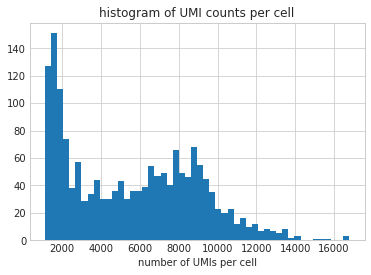

In [14]:
#make the background color white (default is grey)
sns.set_style("whitegrid")

#Histogram of the sums we calculated above. Increase the number of bins for higher resolution.
#What happens if you use different bin sizes? Try it out!
plt.hist(counts_filtered.sum(axis=0), bins=50)

#Give the plot an xlabel and a title
plt.xlabel("number of UMIs per cell")
plt.title('histogram of UMI counts per cell')

#This will prevent any text from being printed out other than your plot. 
#Sometimes these functions automatically print a lot of things that are annoying.
plt.show()

# TODO: plot number of detected genes (x) against cell # (y)

Do these counts look reasonable? Are there any cells that we should filter out? We can also display this as a boxplot. Or a voilinplot. Check out the code below.

Text(0,0.5,u'UMI counts per cell')

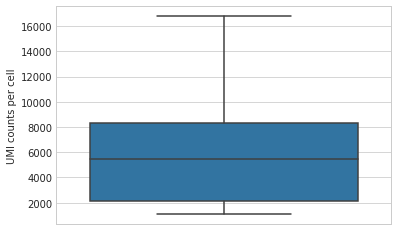

In [15]:
#Making axis labels with seaborn plots is a little different. 
#We are going to call the graph that we made g. then set_ylabel on g

g = sns.boxplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")

Text(0,0.5,u'UMI counts per cell')

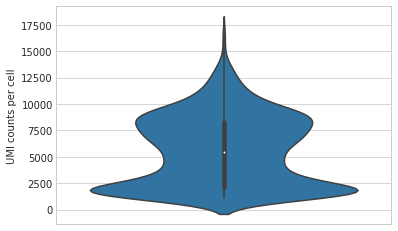

In [16]:
g = sns.violinplot(counts_filtered.sum(axis=0), orient='v')
g.set_ylabel("UMI counts per cell")

**Exercise**

Make a histogram, boxplot, and violoinplot for the total counts measured for each gene (instead of cells). What do you notice? 

#### Finally, let's make sure our index values are unique; Some languages *R* complains if there are duplicate row names (and figure out how to resolve them!)

In [17]:
counts_filtered.loc[counts_filtered.duplicated()]

,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
Gene name,,,,,,,,,,,,,,,,,,,,,


**Save Filtered DataFrame**

Let's save this new matrix as counts_filtered so we can load it in later for downstream analyses. We will use the pandas function to_csv

In [18]:
counts_filtered.to_csv(os.path.join(output_dir, "counts_filtered.csv"))